<a href="https://colab.research.google.com/github/AbinandaP/crypto-analysis/blob/main/CRYPTOCURRENCY_SURVEY_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CRYPTOCURRENCY SURVEY ANALYSIS



A **Cryptocurrency** is a *digital currency* in which transactions are verified and records maintained by a 
***decentralised system*** using cryptography , rather than by *centralised* authority.



*For further information click:*   [Cryptocurrency](https://en.wikipedia.org/wiki/Cryptocurrency)

## ABOUT:

Cryptocurrency is now seen *almost everywhere in the market*, but to what extent do we know about them. The dataset used here was collected with the *sole intention of knowing and understanding* more about cryptocurrencies. In this analysis, the scope is limited to **four popular or mostly used cryptocurrencies**.

They are as follows:
### **_ETHEREUM(ETC), BITCOIN(BTC), BITCOIN CASH(BCH), RIPPLE(XRP)_**

There are also a lot of countries out there who use cryptocurrencies but only *a handful of them* have **legalised** the cryptocurrencies and **allowed the banks to do the same**. In this analysis, only those countries who have **_legalised_**  and  allowed people to frequently using cryptocurrencies are taken into the study(*USA, CHINA,JAPAN, HOLLAND, FRANCE, GERMANY, SINGAPORE, IRELAND, SPAIN, PORTUGAL*).

The dataset was collected from **30 people** from each of the above mentioned countries. [Likert's five point scale](https://en.wikipedia.org/wiki/Likert_scale) was used to get the feedback from the people who are part of the study. 

The questionnaire consisted of the following questions:



1.   **Affinity to Ethereum.**
2.   **Affinity to Bitcoin.**
3.   **Affinity to Bitcoin Cash.**
4.   **Affinity to Ripple.**
5.   **Interest in investing in shares.**
6.   **Frequency of using cryptocurrencies.**
7.   **Affinity to Brave Browser.**
8.   **Security Ratings.**
9.   **Need for improvement in wallets.**
10.  **Flexibility of laws regarding cryptocurrencies.**


## ABSTRACT:

The scope of this analysis is to find more about *cryptocurrencies*. Through this analysis, the following **_objectives_** are met:



1.   **_The extent of relationship between Bitcoin and Bitcoin Cash._**
2.   **_The Functional relationship between Security ratings and Improvements in wallets._**
3.   **_The Functional relationship of Interest in shares with frequency and Felxibility of laws._**
4.   **_Illustrate the popularity of cryptocurrencies from survey visually._**
7.   **_Perform ANOVA analysis._**



### IMPORTING PACKAGES:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression as lr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate

### LOADING DATASET

In [ ]:
df = pd.read_excel("/content/cryptocurrency.xlsx")
df.head(5)

,COUNTRY,LIKENESS OF ETHEREUM,LIKENESS OF BITCOIN,LIKENESS OF RIPPLE,LIKENESS OF BITCOIN CASH,INTEREST IN SHARES,FREQUENCY,LIKENESS OF BRAVE,SECURITY RATINGS,NEED FOR IMPROVEMENT IN WALLET,FLEXIBLITY OF LAWS
0,USA,3.1,4.3,1.4,3.0,2.6,2.8,1.5,1.4,4.3,3.3
1,USA,4.0,4.2,2.2,2.6,3.9,3.0,2.8,1.6,3.2,3.9
2,USA,3.6,4.8,1.7,2.8,2.5,2.6,2.8,1.9,3.1,3.1
3,USA,3.9,3.8,1.5,2.9,3.0,2.5,2.9,2.2,3.7,4.2
4,USA,3.6,4.8,1.9,3.0,3.5,2.6,2.5,1.1,4.2,3.9


In [ ]:
df.describe()

,LIKENESS OF ETHEREUM,LIKENESS OF BITCOIN,LIKENESS OF RIPPLE,LIKENESS OF BITCOIN CASH,INTEREST IN SHARES,FREQUENCY,LIKENESS OF BRAVE,SECURITY RATINGS,NEED FOR IMPROVEMENT IN WALLET,FLEXIBLITY OF LAWS
count,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,3.208667,4.211667,2.63000,2.607333,3.529667,3.657000,3.715667,3.138667,3.579333,3.560000
std,0.806780,0.591097,0.85659,0.665047,0.959978,0.693002,0.923597,0.938745,0.737826,0.805043
min,1.500000,2.500000,1.00000,1.000000,1.200000,2.000000,1.000000,1.000000,1.200000,1.500000
25%,2.500000,3.900000,2.00000,2.175000,2.800000,3.175000,3.000000,2.400000,3.200000,3.000000
50%,3.300000,4.300000,2.50000,2.600000,3.800000,3.600000,3.900000,3.100000,3.700000,3.700000
75%,3.800000,4.600000,3.10000,3.000000,4.300000,4.100000,4.500000,3.900000,4.100000,4.125000
max,4.900000,5.000000,4.70000,4.400000,5.000000,5.000000,5.000000,5.000000,4.900000,5.000000


Some ot the basic *description* of the data is done.

In [ ]:
table,a,m=[],[],[]
a=df['COUNTRY']

<bound method Series.unique of 0          USA
1          USA
2          USA
3          USA
4          USA
        ...   
295    HOLLAND
296    HOLLAND
297    HOLLAND
298    HOLLAND
299    HOLLAND
Name: COUNTRY, Length: 300, dtype: object>

### 1. SIMPLE LINEAR CORRELATION

To find the extent of the relationship between bitcoin and bitcoin cash, **_simple linear correlation_** is used. 

In [ ]:
bitcoin=df['LIKENESS OF BITCOIN'].to_numpy()
bitcoin_cash=df["LIKENESS OF BITCOIN CASH"].to_numpy()
ans=np.corrcoef(bitcoin,bitcoin_cash)
print("Correlation between likeness of bitcoin and bitcoin cash is ",ans[0,1]) 


Correlation between likeness of bitcoin and bitcoin cash is  0.4187065663109614


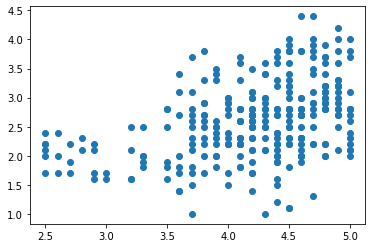

In [ ]:
plt.scatter(bitcoin,bitcoin_cash)
plt.show()

There is **no negative correlation** between bitcoin and bitcoin cash. At the same time, there is **_no significant_** strength in the relationship between the two.

### 2. SIMPLE LINEAR REGRESSION

To find the functional relationship between security ratings and wallets improvement, **_ordinary linear regression_** is used. Here, security ratings is the **predictor** variable while the wallets improvement is the **dependent variable**.

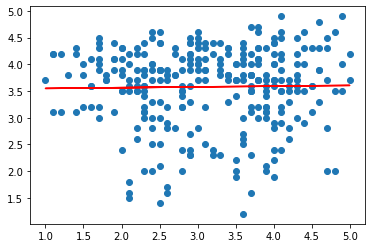

Regression function:  [0.01407914]  X +  3.535143604903587


In [ ]:
security=df['SECURITY RATINGS'].to_numpy().reshape(-1,1)
wallet=df["NEED FOR IMPROVEMENT IN WALLET"].to_numpy()
yp=[]
model=lr()
reg=model.fit(security,wallet)
slope=model.predict(security)
plt.scatter(security,wallet)
plt.plot(security,slope,color="red")
plt.show()
print("Regression function: ",reg.coef_," X + ",reg.intercept_)


The function indicates that there is only a **no significant** contribution made by the security ratings to the *dependent* variable wallets improvement. With this, we can conclude that **_there maybe other parameters that greatly influence_** the improvements in wallets.

### 3. MULTIPLE LINEAR REGRESSION

To find the functional relationship of interest in shares with frequency and flexibility of laws, **_multiple linear regression_** is employed. Here, the frequency and felxibility of laws are the **independent variables** while the interest in shares is the **dependent variable**.

In [ ]:
mlr_x=df[["FREQUENCY","FLEXIBLITY OF LAWS"]]
mlr_y=df["INTEREST IN SHARES"]
model=lr()
reg=model.fit(mlr_x,mlr_y)
print("MLR model : ",reg.coef_," X + ",reg.intercept_)


MLR model :  [ 0.39014922 -0.34372065]  X +  3.326536479689376


The above model describes that relationship between or the contribution of the frequency and flexibility of laws to interest in shares.

### 4. PLOTTING GRAPH


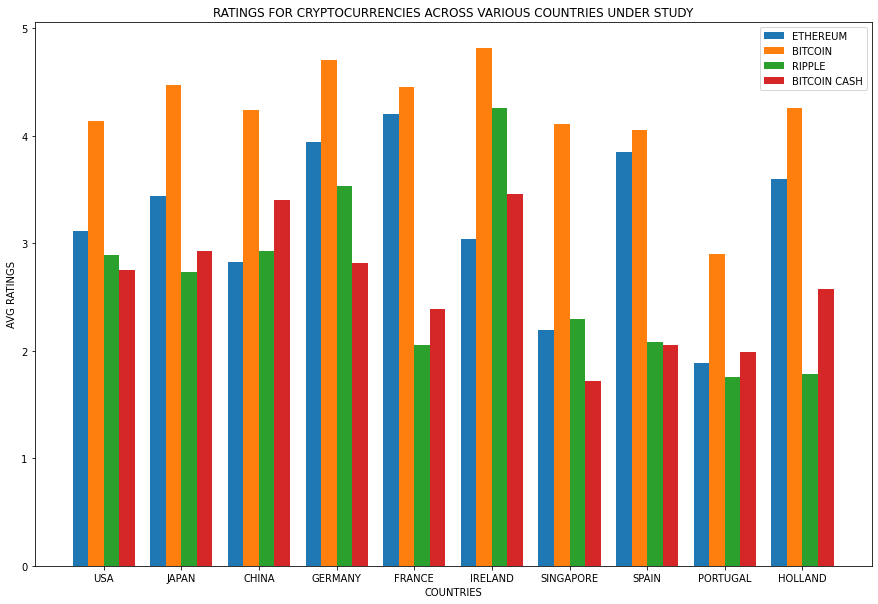

In [ ]:
width=0.2
fig=plt.figure()
fig.set_figwidth(15)
fig.set_figheight(10)
country=df['COUNTRY']
country=list(country.unique())
etc=df.groupby('COUNTRY')['LIKENESS OF ETHEREUM'].mean()
btc=df.groupby('COUNTRY')['LIKENESS OF BITCOIN'].mean()
xrp=df.groupby('COUNTRY')['LIKENESS OF RIPPLE'].mean()
bch=df.groupby('COUNTRY')['LIKENESS OF BITCOIN CASH'].mean()
bar1=np.arange(len(country))
bar2=[i+width for i in bar1]
bar3=[i+width for i in bar2]
bar4=[i+width for i in bar3]
plt.bar(bar1,etc,width,label="ETHEREUM")
plt.bar(bar2,btc,width,label="BITCOIN")
plt.bar(bar3,xrp,width,label="RIPPLE")
plt.bar(bar4,bch,width,label="BITCOIN CASH")
plt.xlabel("COUNTRIES")
plt.ylabel("AVG RATINGS")
plt.title("RATINGS FOR CRYPTOCURRENCIES ACROSS VARIOUS COUNTRIES UNDER STUDY")
plt.xticks(bar1+width+width/2,country)
plt.legend()
plt.show()

The above graph **multiple bar graph** has *Avg ratings* **vs** *Countries* for four different cryptocurrencies.

### 5. ANOVA

To find whether **_France , Spain and Germany_** are similar or not with each other, **ANOVA** is employed.

H(0) : france(mean)=spain(mean)=germany(mean)

H(A) : Atleast one mean is different from others.

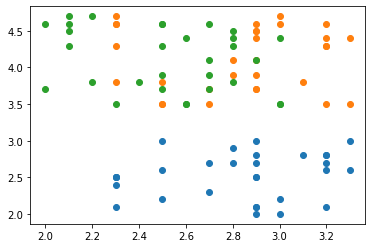

In [ ]:
france=df[df.COUNTRY=="FRANCE"]
germany=df[df.COUNTRY=="GERMANY"]
spain=df[df.COUNTRY=="SPAIN"]
france=list(france['INTEREST IN SHARES'])
germany=list(germany['INTEREST IN SHARES'])
spain=list(spain['INTEREST IN SHARES'])
plt.scatter(france,spain)
plt.scatter(france,germany)
plt.scatter(spain,germany)
plt.show()

In [ ]:
france=df[df.COUNTRY=="FRANCE"]
germany=df[df.COUNTRY=="GERMANY"]
spain=df[df.COUNTRY=="SPAIN"]
france=list(france['INTEREST IN SHARES'])
germany=list(germany['INTEREST IN SHARES'])
spain=list(spain['INTEREST IN SHARES'])
stat,pvalue=f_oneway(france,germany,spain)
print("F STAT VALUE= ",stat)
print("PVALUE= {}".format(pvalue))

F STAT VALUE=  166.87603995825225
PVALUE= 1.6747295294971765e-30


From **p-value**, since PVALUE < **0.05** the null hypothesis is rejected. Therefore **atleast one mean is significantly different from the other**.

To find whether **_China and Japan_** are similar or not with each other,**ANOVA** is employed.

H(0) : china(mean)=japan(mean)

H(A) : china(mean) != japan(mean)

In [ ]:
china=df[df['COUNTRY']=="CHINA"]
japan=df[df['COUNTRY']=="JAPAN"]
china=list(china['LIKENESS OF ETHEREUM'])
japan=list(japan['LIKENESS OF ETHEREUM'])
stat,pvalue=f_oneway(china,japan)
print("F STAT = ",stat)
print("PVALUE =",pvalue)

F STAT =  0.3247570569180935
PVALUE = 0.570963612925472


Here, the PVALUE > 0.05 meaning that **there is not significant difference in the means of china and japan**.
Therefore, these countries(*japan,china*) have same **Affinity towards ethereum**.